In [37]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [9]:
os.chdir('//Users//gaurav//Library//CloudStorage//OneDrive-Personal//Desktop//Oasis//Customer Segmentation')

In [10]:
df=pd.read_csv('ifood_df.csv')

In [11]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [12]:
df.shape

(2205, 39)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [6]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [7]:
df.dtypes

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [14]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [22]:
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

here we can see that Z_CostContact and Z_revenue have only 1 value so its better to remove these columns

In [23]:
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2205.0,27.128345,41.130468,0.0,1.0,8.0,34.0,262.0
MntGoldProds,2205.0,44.057143,51.736211,0.0,9.0,25.0,56.0,321.0


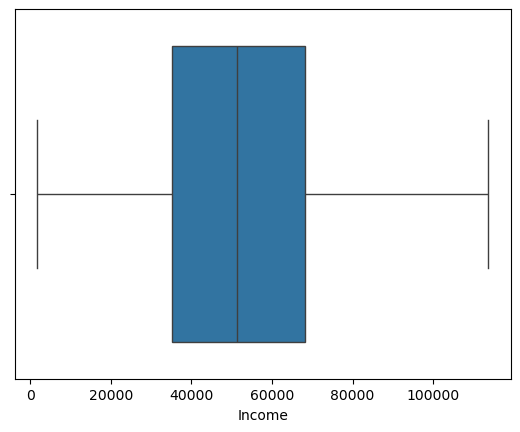

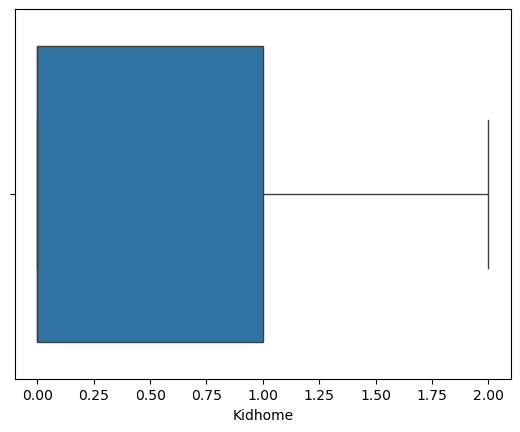

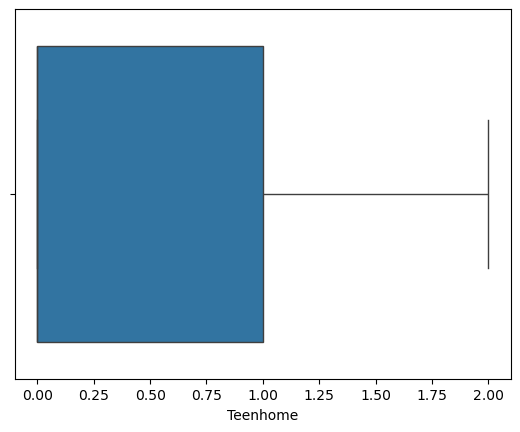

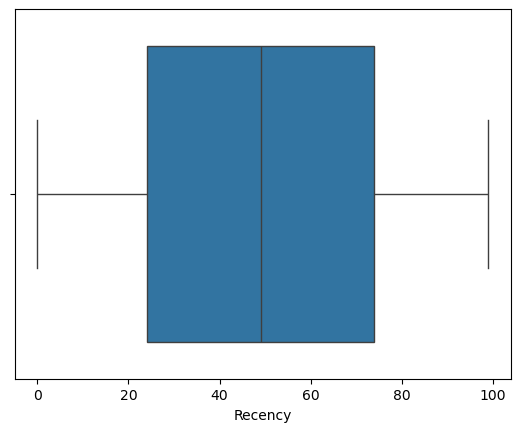

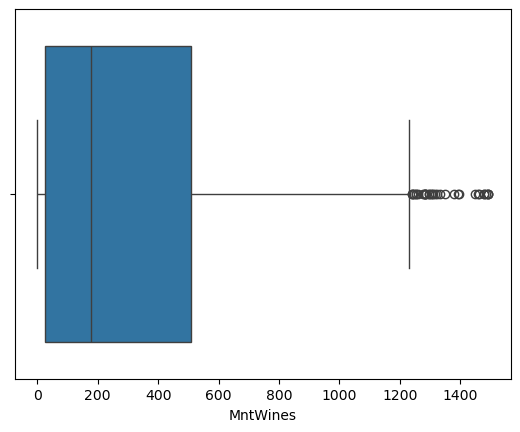

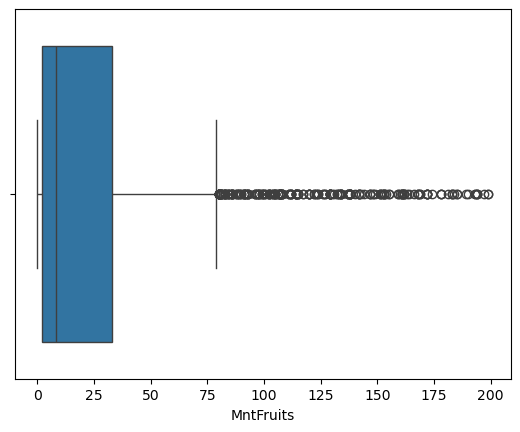

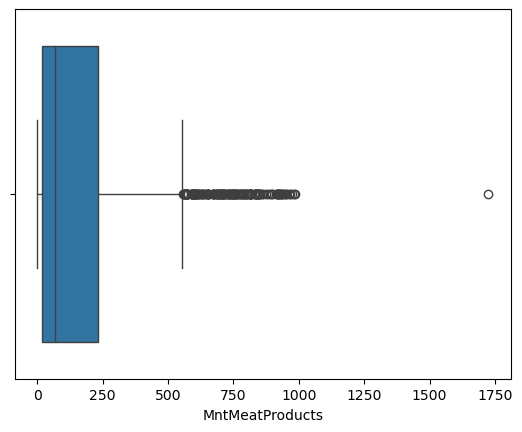

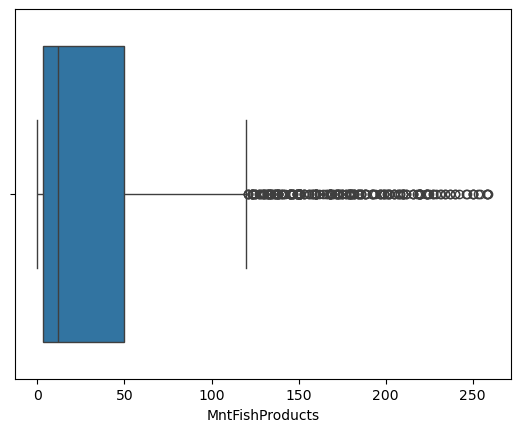

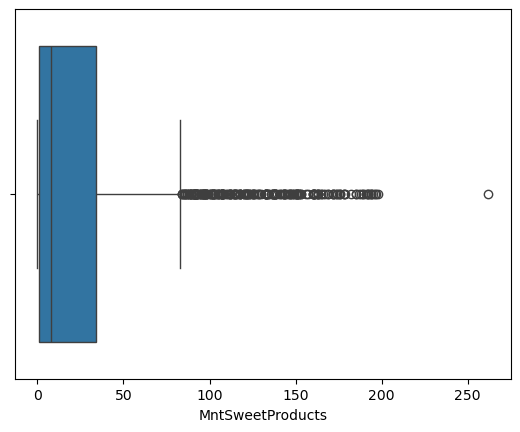

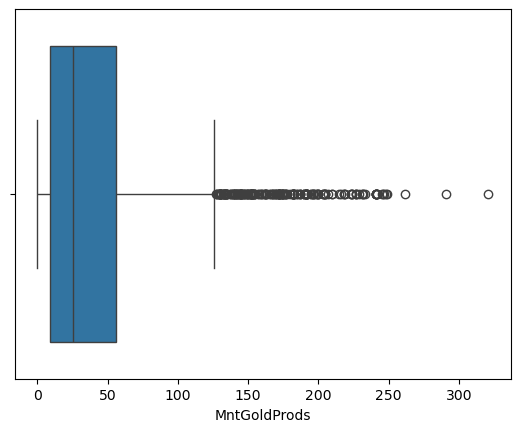

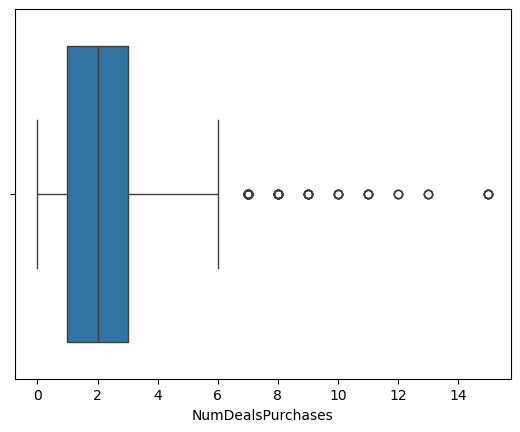

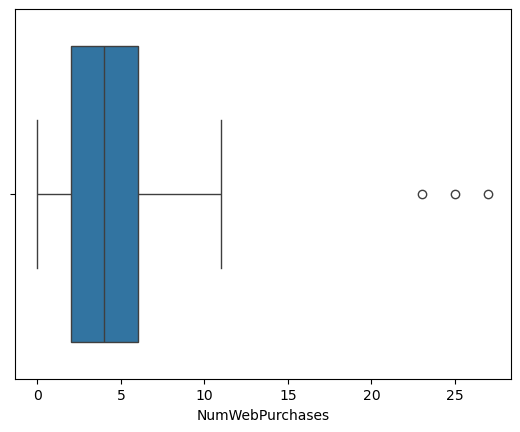

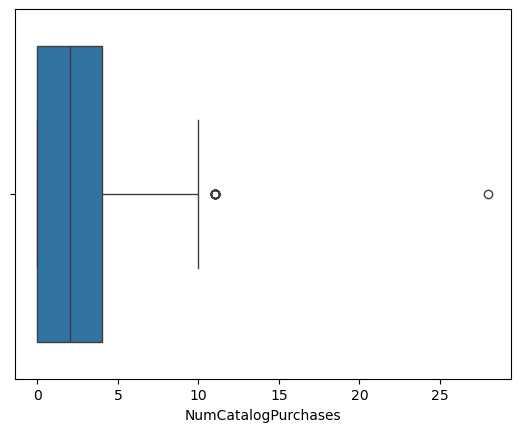

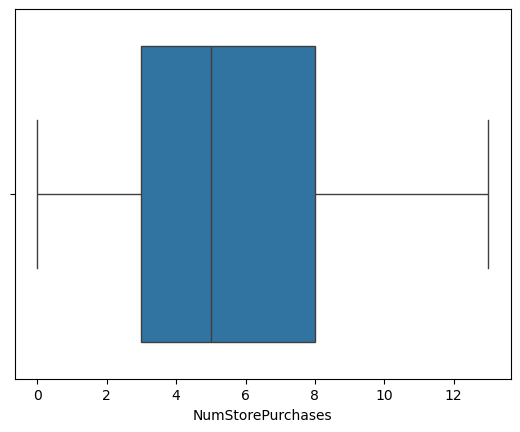

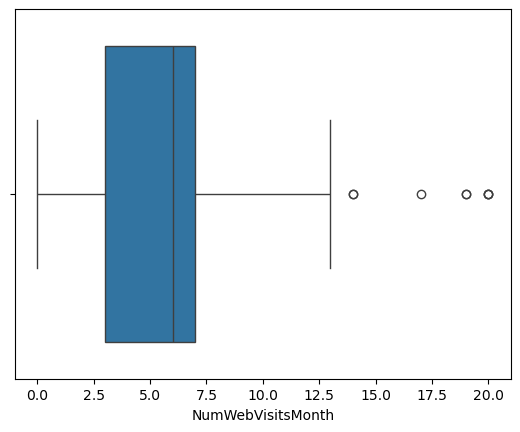

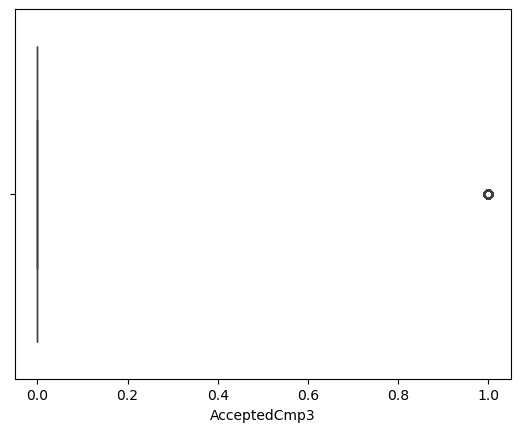

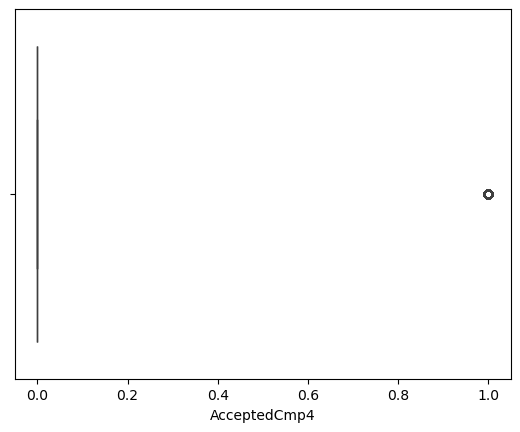

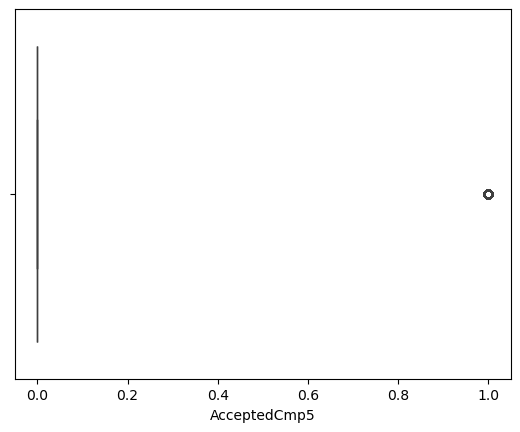

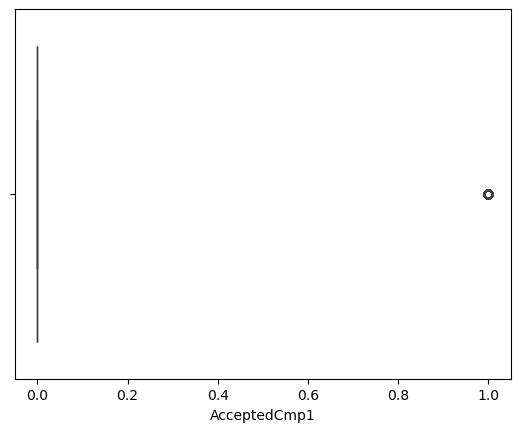

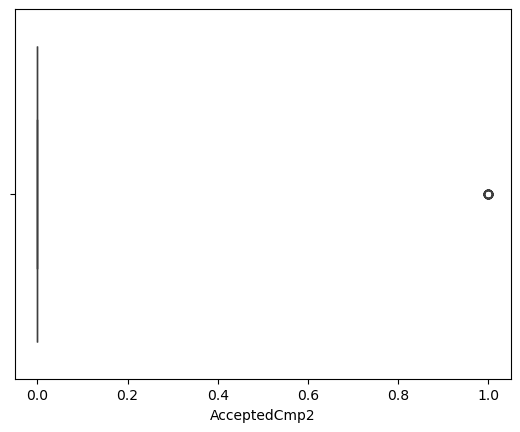

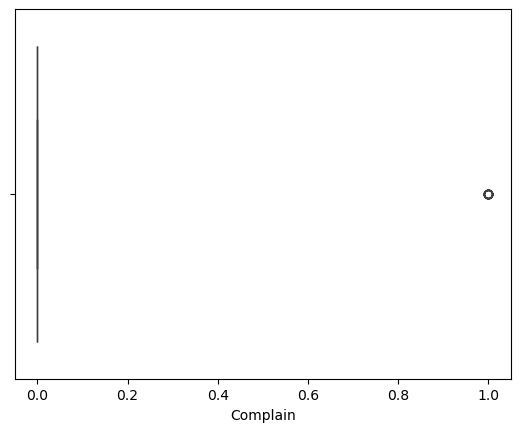

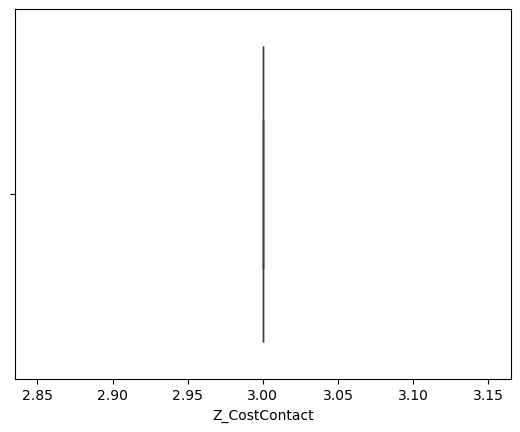

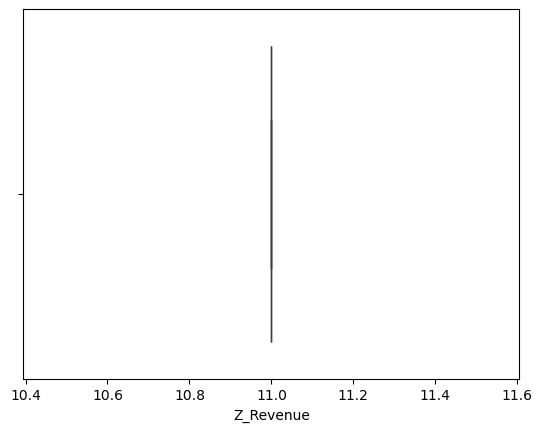

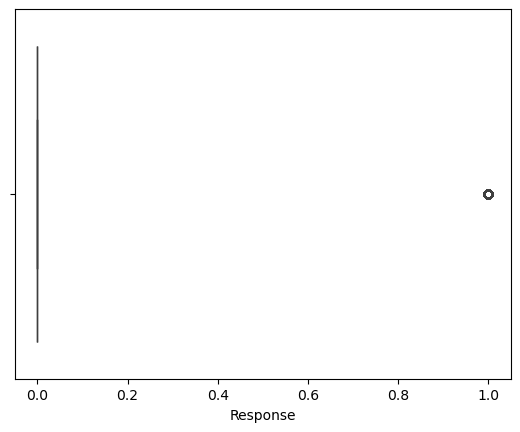

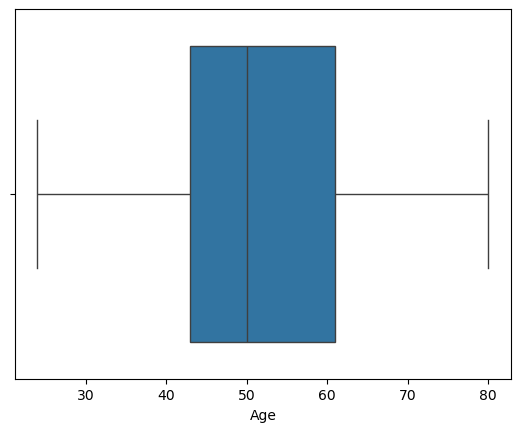

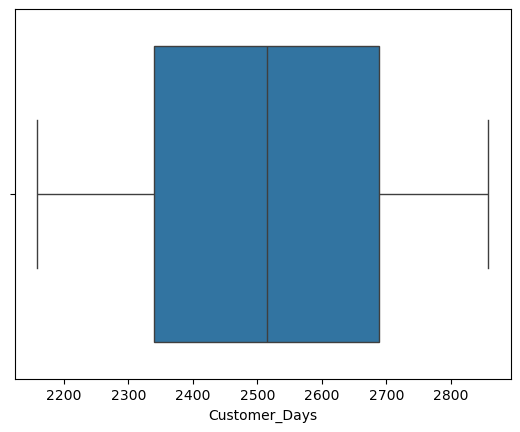

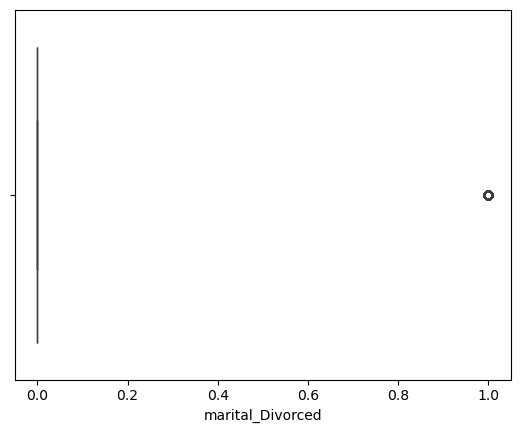

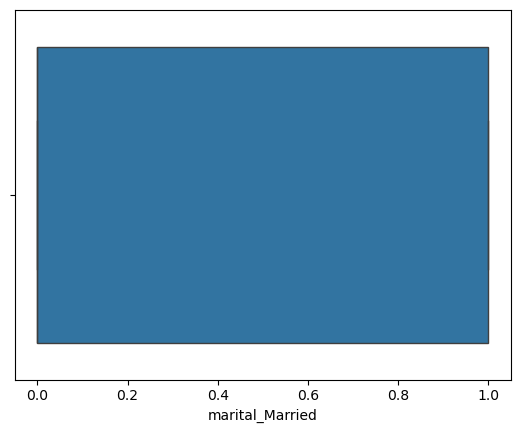

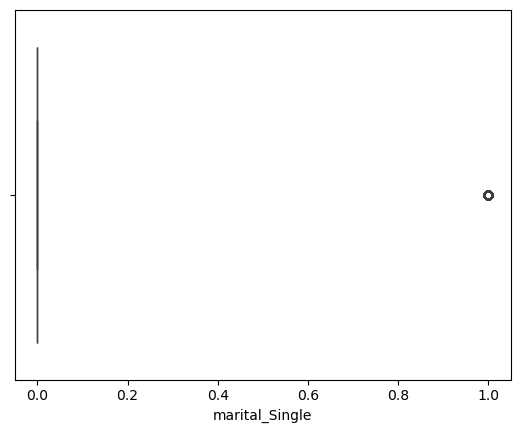

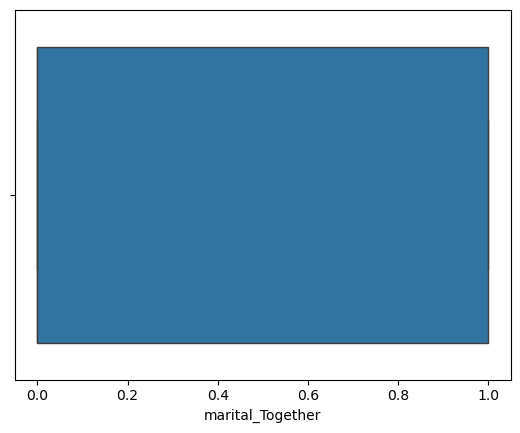

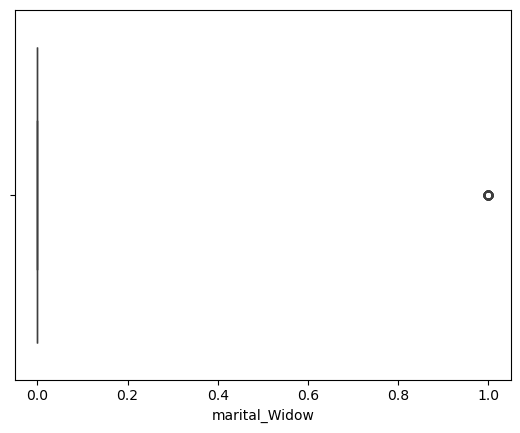

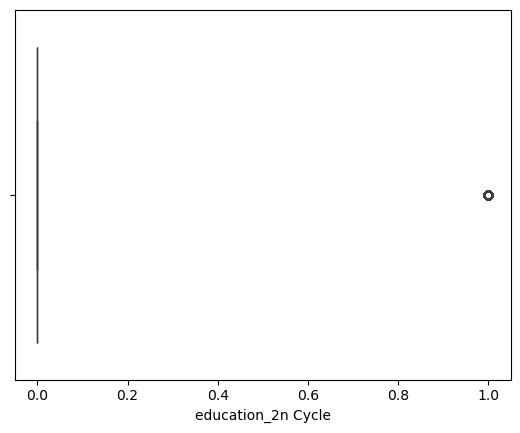

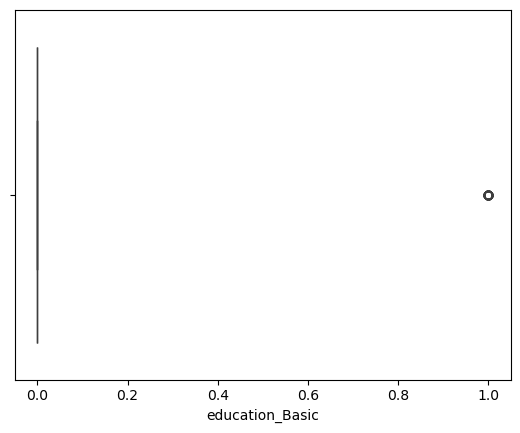

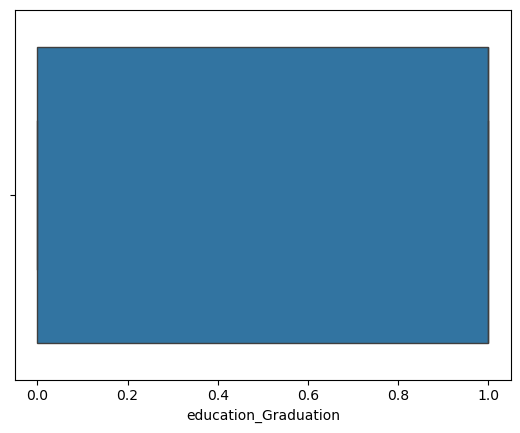

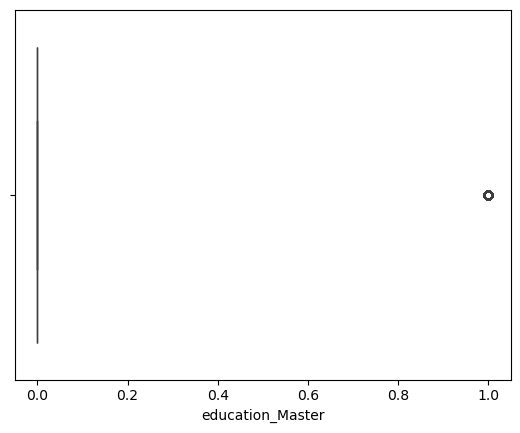

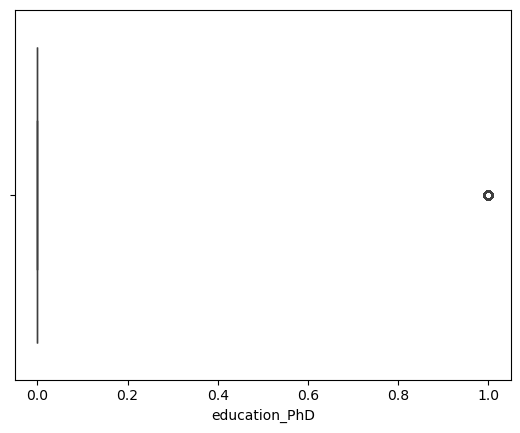

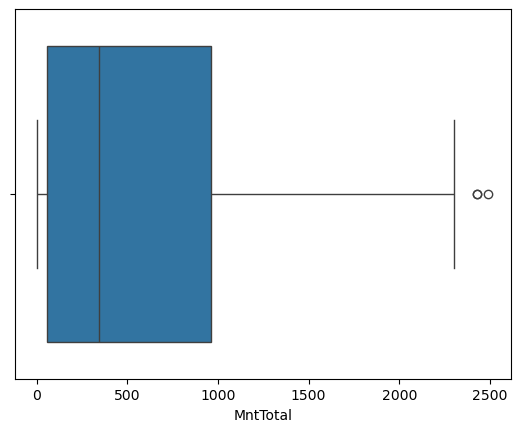

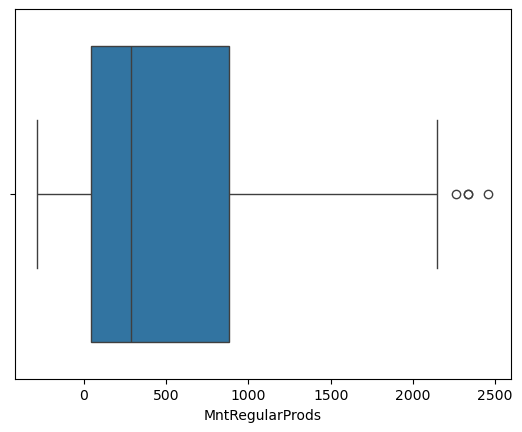

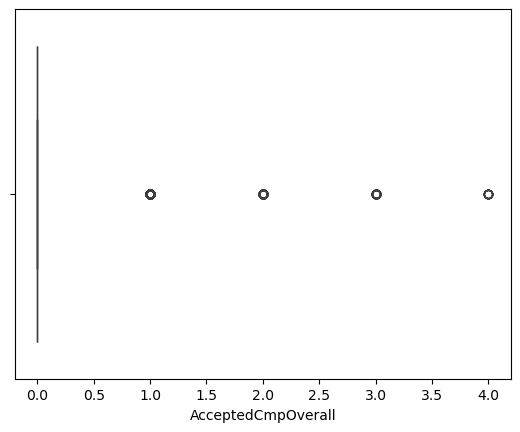

In [17]:
for i in df:
    sns.boxplot(data=df,x=i)
    plt.show()

here we can see many columns contain outliers like total amount , amount spend on meat etc 
so we can't just cap them into average value because they are our important customer and gives
information and insights to marketing team for targeteing campaign

we cap ouliers in column MntRegularProds because it cant be negative 

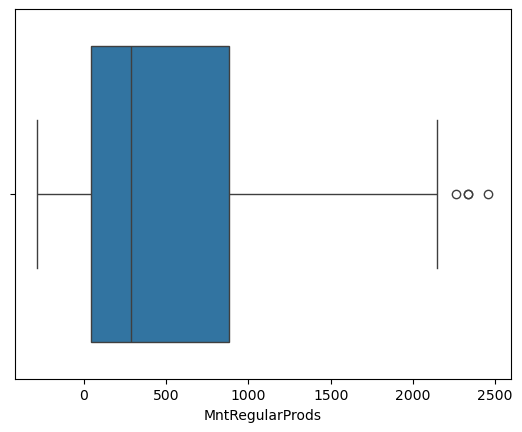

In [26]:
for i in ['MntRegularProds']:
    sns.boxplot(data=df,x=i)
    plt.show()

In [27]:
for i in ['MntRegularProds']:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ur=q3+1.5*iqr
    lr=q1-1.5*iqr
    df[i]=df[i].clip(lower=lr,upper=ur)

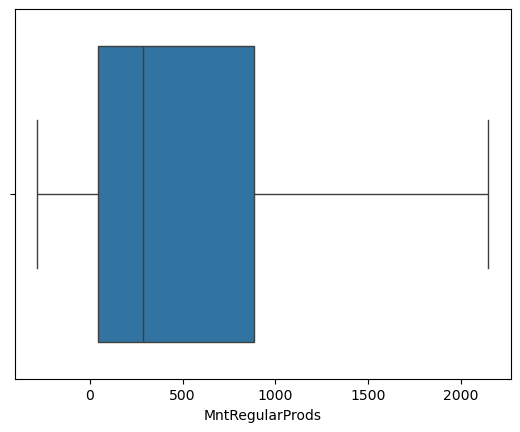

In [28]:
for i in ['MntRegularProds']:
    sns.boxplot(data=df,x=i)
    plt.show()

In [31]:
df['MntRegularProds'].describe().T

count    2205.000000
mean      518.346939
std       552.712402
min      -283.000000
25%        42.000000
50%       288.000000
75%       884.000000
max      2147.000000
Name: MntRegularProds, dtype: float64

our upper value is now between IQR range but since our min value is lower than 0 , hence the 
min value is still showing negative 

In [32]:
df['MntRegularProds'] = df['MntRegularProds'].clip(lower=0)

so we can clip our lower value to 0

In [33]:
df['MntRegularProds'].describe().T

count    2205.000000
mean      518.619048
std       552.403401
min         0.000000
25%        42.000000
50%       288.000000
75%       884.000000
max      2147.000000
Name: MntRegularProds, dtype: float64

In [35]:
ss = StandardScaler()
scaled_df = ss.fit_transform(df)

In [36]:
scaled_df

array([[ 0.31465086, -0.82340514, -0.93076676, ...,  1.67805628,
         1.67013849, -0.4399912 ],
       [-0.25487741,  1.03875725,  0.90660182, ..., -0.94087999,
        -0.91189389, -0.4399912 ],
       [ 0.96535404, -0.82340514, -0.93076676, ...,  0.29738364,
         0.31393775, -0.4399912 ],
       ...,
       [ 0.25877972, -0.82340514, -0.93076676, ...,  1.1362074 ,
         1.22108938,  1.0299794 ],
       [ 0.85100412, -0.82340514,  0.90660182, ...,  0.38074501,
         0.36644753, -0.4399912 ],
       [ 0.06021263,  1.03875725,  0.90660182, ..., -0.71510962,
        -0.70366547, -0.4399912 ]])

In [38]:
inertia = []
k_range = range(1, 11)  

for k in k_range:
    km = KMeans(n_clusters=k, random_state=54)
    km.fit(scaled_df)
    inertia.append(km.inertia_)  

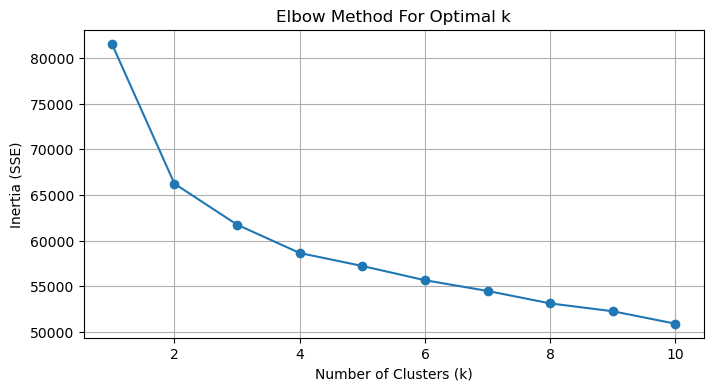

In [39]:
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.grid(True)
plt.show()

here we can see that optimal clustering would be 4 to 6 so lets go with 5 

In [40]:
km = KMeans(n_clusters=5,random_state=42)
kmeans_labels = km.fit_predict(scaled_df)

In [42]:
df['kmeans_cluster'] = kmeans_labels

In [43]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,kmeans_cluster
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,2
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,1
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,2
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,1,0,0,1094,847,0,2
2201,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,0,0,0,1,436,428,1,3
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,1,0,0,1217,1193,1,2
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,0,0,1,0,782,721,0,3


In [46]:
df['kmeans_cluster'].value_counts().sort_index()

kmeans_cluster
0     30
1    977
2    444
3    567
4    187
Name: count, dtype: int64

In [56]:
cluster_centroids=df.groupby('kmeans_cluster').mean().round(2)

In [57]:
cluster_centroids

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
kmeans_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,71054.83,0.07,0.43,48.67,898.67,22.97,250.30,38.73,30.60,66.40,1.70,4.90,5.17,8.17,5.17,0.23,0.73,0.57,0.43,1.0,0.00,0.67,51.87,2523.10,0.17,0.23,0.17,0.40,0.03,0.07,0.00,0.53,0.07,0.33,1241.27,1174.87,2.97
1,33625.08,0.81,0.42,49.35,36.45,4.93,22.20,7.24,5.18,15.40,2.01,2.05,0.52,3.14,6.52,0.07,0.01,0.00,0.00,0.0,0.01,0.09,47.78,2482.18,0.10,0.39,0.24,0.25,0.02,0.11,0.05,0.50,0.16,0.18,76.01,60.77,0.08
2,71622.21,0.06,0.30,50.64,506.07,71.16,397.62,99.97,70.02,77.93,1.65,5.40,5.60,8.59,3.16,0.05,0.02,0.00,0.04,0.0,0.01,0.14,52.09,2528.95,0.11,0.36,0.24,0.25,0.04,0.09,0.00,0.60,0.11,0.20,1144.84,1066.91,0.10
3,56017.62,0.26,0.94,47.52,405.35,17.62,115.37,24.36,17.18,55.30,3.81,6.07,2.72,7.33,5.79,0.07,0.12,0.00,0.02,0.0,0.01,0.11,56.09,2550.89,0.12,0.40,0.16,0.28,0.04,0.05,0.00,0.44,0.22,0.29,579.88,525.37,0.22
4,81717.19,0.05,0.13,47.91,844.85,59.50,499.25,89.91,69.58,75.71,1.07,5.60,6.11,8.34,2.95,0.14,0.30,0.76,0.52,0.0,0.01,0.52,50.80,2516.30,0.06,0.43,0.23,0.23,0.05,0.08,0.00,0.51,0.18,0.22,1563.09,1483.12,1.73


In [58]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 200)         

print(cluster_centroids)  

                  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
kmeans_cluster                                                                                                                                                                                         
0               71054.83     0.07      0.43    48.67    898.67      22.97           250.30            38.73             30.60         66.40               1.70             4.90                 5.17   
1               33625.08     0.81      0.42    49.35     36.45       4.93            22.20             7.24              5.18         15.40               2.01             2.05                 0.52   
2               71622.21     0.06      0.30    50.64    506.07      71.16           397.62            99.97             70.02         77.93               1.65             5.40                 5.60   


# 🛒 Customer Segmentation with K-Means  

## 👑 Cluster 0 – Ultra VIPs  
- Income: ~71k  
- Very high spending (~1241 total, wines & meat heavy)  
- Strong campaign response (~3 accepted)  
- Very few kids at home  
- **Profile:** Elite, loyal, high-value customers — best for premium offers & loyalty programs  

---

## 👨‍👩‍👧 Cluster 1 – Budget-Conscious Families  
- Income: ~33k (lowest)  
- Very low spending (~76 total)  
- Many with children  
- Very low campaign response (~0.08)  
- **Profile:** Price-sensitive families — best for discounts & family bundles  

---

## 💼 Cluster 2 – Professional Spenders  
- Income: ~71k  
- High spending (~1067 total, meat & wines)  
- Smaller households  
- Low campaign response (~0.10)  
- **Profile:** Quiet big spenders — ideal for cross-selling & premium recommendations  

---

## 👨‍👩‍👦 Cluster 3 – Family Moderates  
- Income: ~56k  
- Moderate spending (~580 total)  
- Many households with teens  
- Average campaign response (~0.22)  
- **Profile:** Practical families — good for seasonal promotions & loyalty rewards  

---

## 💎 Cluster 4 – Premium Elite  
- Income: ~82k (highest)  
- Highest spending (~1563 total, wines, fruits, meats)  
- Small households  
- Medium campaign response (~1.7)  
- **Profile:** Top-tier customers — best for exclusivity, high-margin products, VIP treatment  


In [61]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall', 'kmeans_cluster'],
      dtype='object')